In [1]:
import sys
sys.path.append('../..')

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import matplotlib as mpl
import seaborn as sns

from scipy import stats

import src.visualizor

In [2]:
df = pd.read_csv('../../data/processed/data.csv')

C:\Users\marcu\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3418: DtypeWarning: Columns (18,22) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df['ratio'] = df.likes / (df.dislikes + df.likes)

In [5]:
mask = df.commentDateOffset < 10000000000
agg = df[mask].groupby(['primaryTitle', 'tconst', 'videoId', 'network']).agg(
    likes=('likes', 'mean'),
    dislikes=('dislikes', 'mean'),
    numComments=('commentId', 'count'),
    sentiment=('sentimentPredictedScore', 'mean'),
    averageRating=('averageRating', 'mean'),
    ratio=('ratio', 'mean')
).reset_index()

In [6]:
mask = agg.numComments >= 100
agg[mask].corr()

,likes,dislikes,numComments,sentiment,averageRating,ratio
likes,1.000000,0.041214,0.447780,0.024972,0.156612,0.135174
dislikes,0.041214,1.000000,0.879443,-0.180578,-0.172721,-0.355120
numComments,0.447780,0.879443,1.000000,-0.170172,-0.068612,-0.262886
sentiment,0.024972,-0.180578,-0.170172,1.000000,0.228823,0.257063
averageRating,0.156612,-0.172721,-0.068612,0.228823,1.000000,0.373533
ratio,0.135174,-0.355120,-0.262886,0.257063,0.373533,1.000000


In [27]:
params = {
    'netflix': {
        'color': '#E24A33',
        'label': 'netflix'
    },
    'amazon': {
        'color': '#348ABD',
        'label': 'amazon'
    },
    'hbo': {
        'color': '#988ED5',
        'label': 'hbo'
    },
    'disney': {
        'color': '#8EBA42',
        'label': 'disney'
    }
}


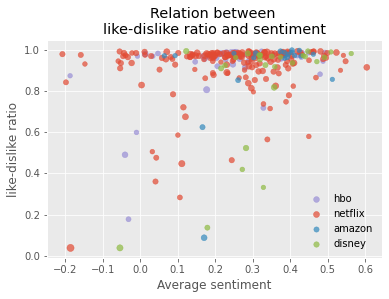

In [51]:
fig, ax = plt.subplots()
X = agg
mask = X.numComments >= 100
X = X[mask]

for network in X.network.unique():
    mask = network == X.network
    ax.scatter(X[mask].sentiment, X[mask].ratio, alpha=.7, s=np.log2(X[mask].numComments)*3, **params[network])

    
ax.set_xlabel('Average sentiment')
ax.set_ylabel('like-dislike ratio')
ax.set_title('Relation between \nlike-dislike ratio and sentiment')
ax.legend()

In [52]:
fig.savefig('../../reports/figs/likedislike_sentiment_scatter.svg')

In [53]:
stats.pearsonr(agg.sentiment, agg.ratio)

(0.16977180753665572, 0.00035299204219300934)